In [66]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [67]:
#nécessaire si fichiers sur google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [68]:
#root_path = "/content/drive/MyDrive/"
root_path = "../"
naiades_path = root_path+"naiades_export/" # à changer avec le bon chemin

In [69]:
#naiades_path = "naiades_export/naiades_export/"

# 1. Obtention des données
## Chargement des fichiers
On charge ici tous les fichiers de l'export (préalablement compressés pour préserver la place sur le disque)

In [70]:
#gz=".gz" #remplacer par la chaine vide si pas de compression
gz=""

cond_env = pd.read_csv(naiades_path+"ConditionsEnvironnementales.CSV"+gz,sep=";")
op = pd.read_csv(naiades_path+"Operations.CSV"+gz,sep=";")
stn = pd.read_csv(naiades_path+"Stations.CSV"+gz,sep=";")
analyses = pd.read_csv(naiades_path+"Analyses.CSV"+gz,sep=";",parse_dates =['DatePrel'])


/tmp/ipykernel_994625/3087252006.py:7: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  analyses = pd.read_csv(naiades_path+"Analyses.CSV"+gz,sep=";",parse_dates =['DatePrel'])


Au final le contenu du fichier analyses contient toutes les informations nécessaires pour notre analyse

In [71]:
pd.set_option('display.max_columns', None)
analyses.head(5)

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,CdSupport,LbSupport,CdFractionAnalysee,LbFractionAnalysee,CdPrelevement,DatePrel,HeurePrel,DateAna,HeureAna,CdParametre,LbLongParamètre,RsAna,CdUniteMesure,SymUniteMesure,CdRqAna,MnemoRqAna,CdInsituAna,LbInsituAna,ProfondeurPrel,CdDifficulteAna,MnemoDifficulteAna,LdAna,LqAna,LsAna,IncertAna,CdMetFractionnement,NomMetFractionnement,CdMethode,NomMethode,RdtExtraction,CdMethodeExtraction,NomMethodeExtraction,CdAccreAna,MnemoAccredAna,AgreAna,CdStatutAna,MnemoStatutAna,CdQualAna,LbQualAna,CommentairesAna,ComResultatAna,CdRdd,NomRdd,CdProducteur,NomProducteur,CdPreleveur,NomPreleveur,CdLaboratoire,NomLaboratoire
0,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,10:05:00,1301,Température de l'Eau,8.7,27,°C,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,500,Qualité de l'eau - Mesure de la température,NaN,NaN,NaN,2,Analyse réalisée hors accréditation,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
1,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,10:05:00,1302,pH,8.4,264,unité pH,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,380,Essais des eaux - Mesure électrométrique du pH...,NaN,NaN,NaN,2,Analyse réalisée hors accréditation,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
2,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,10:05:00,1303,Conductivité,456.0,147,µS/cm,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,30.0,NaN,NaN,NaN,NaN,231,Qualité de l'eau - Détermination de la conduct...,NaN,NaN,NaN,2,Analyse réalisée hors accréditation,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
3,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,10:05:00,1311,Oxygène dissous,10.6,175,mg(O2)/L,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,0.1,NaN,NaN,NaN,NaN,238,Qualité de l'eau - Dosage de l'oxygène dissous...,NaN,NaN,NaN,2,Analyse réalisée hors accréditation,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
4,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,18:52:00,1305,Matières en suspension,2.0,162,mg/L,1,Résultat > seuil de quantification et < au seu...,2,Laboratoire,NaN,0,Difficultés inconnues,NaN,2.0,NaN,NaN,NaN,NaN,237,Qualité de l'eau - Dosage des matières en susp...,NaN,NaN,NaN,1,Analyse réalisée sous accréditation,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,22670001100019,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR


In [72]:
pd.set_option('display.max_rows', 20)
analyses["CdRdd"]

0         0200000007
1         0200000007
2         0200000007
3         0200000007
4         0200000007
             ...    
359559    0200000063
359560    0200000063
359561    0200000063
359562    0200000063
359563    0200000063
Name: CdRdd, Length: 359564, dtype: object

In [73]:
analyses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359564 entries, 0 to 359563
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   CdStationMesureEauxSurface  359564 non-null  int64         
 1   LbStationMesureEauxSurface  359564 non-null  object        
 2   CdSupport                   359564 non-null  int64         
 3   LbSupport                   359564 non-null  object        
 4   CdFractionAnalysee          359564 non-null  int64         
 5   LbFractionAnalysee          359564 non-null  object        
 6   CdPrelevement               359564 non-null  int64         
 7   DatePrel                    359564 non-null  datetime64[ns]
 8   HeurePrel                   356743 non-null  object        
 9   DateAna                     346082 non-null  object        
 10  HeureAna                    345938 non-null  object        
 11  CdParametre                 359564 non-

# 2. Compréhension et vérification des données

## Valeurs comparables
### Fractions et Support
Pour un support donné plusieurs fractions sont possibles et pour une fraction donnée un seul support correspond.


In [74]:
test = analyses[['CdSupport','CdFractionAnalysee']].drop_duplicates()

In [75]:
original = analyses[['CdSupport', 'CdFractionAnalysee']]
dropped = original.drop_duplicates()

# Find rows that are in the original but not in the deduplicated version
to_drop = original.merge(dropped, on=['CdSupport', 'CdFractionAnalysee'], how='left', indicator=True)
print(to_drop[to_drop['_merge'] == 'left_only'])

Empty DataFrame
Columns: [CdSupport, CdFractionAnalysee, _merge]
Index: []


In [76]:
print('Nombre de fractions par support')
test.groupby(['CdSupport']).count()

Nombre de fractions par support


,CdFractionAnalysee
CdSupport,
3,2
6,2
7,1


In [77]:
print('Nombre de fractions par support')
test.groupby(['CdSupport']).count()

Nombre de fractions par support


,CdFractionAnalysee
CdSupport,
3,2
6,2
7,1


In [78]:
print('Nombre de supports par fraction')
test.groupby(['CdFractionAnalysee']).count()

Nombre de supports par fraction


,CdSupport
CdFractionAnalysee,
3,1
23,1
31,1
32,1
42,1


### Fractions par paramètre


In [79]:
frac_param = analyses[['CdParametre','CdFractionAnalysee']].drop_duplicates()
frac_count =frac_param.groupby(['CdParametre']).count().sort_values(['CdFractionAnalysee'],ascending=False)
frac_count.head()

,CdFractionAnalysee
CdParametre,
1841,4
1369,4
1392,4
1382,4
1383,4


In [80]:
frac_count.value_counts()

CdFractionAnalysee
1                     557
2                     180
3                      51
4                      10
Name: count, dtype: int64

Une part non-négligeable des paramètres peut être mesurée sur
plusieurs fractions

### Unité de mesure par paramètre

In [81]:
unite_param = analyses[['CdParametre','CdUniteMesure']].drop_duplicates()
unite_count =unite_param.groupby(['CdParametre']).count().sort_values(['CdUniteMesure'],ascending=False)
unite_count.value_counts()

CdUniteMesure
1                565
2                233
Name: count, dtype: int64

In [82]:
unite_param_frac = analyses[['CdParametre','CdFractionAnalysee','CdUniteMesure']].drop_duplicates()
unite_count =unite_param_frac.groupby(['CdParametre','CdFractionAnalysee']).count().sort_values(['CdUniteMesure'],ascending=False)
unite_count.value_counts()

CdUniteMesure
1                1110
Name: count, dtype: int64

In [83]:
unite_param_frac.groupby(['CdParametre','CdFractionAnalysee']).count().sort_values(['CdUniteMesure'],ascending=False)

CdUniteMesure
CdParametre CdFractionAnalysee               
7893        23                              1
1082        23                              1
            32                              1
            42                              1
1083        23                              1
...                                       ...
1108        23                              1
1109        23                              1
1110        23                              1
            32                              1
1111        23                              1

[1110 rows x 1 columns]

Même constat pour les unités de mesure

### Fraction par unité

In [84]:
frac_unite = analyses[['CdFractionAnalysee','CdUniteMesure']].drop_duplicates()
unite_count_2 =frac_unite.groupby(['CdUniteMesure']).count().sort_values(['CdFractionAnalysee'],ascending=False)
unite_count_2.value_counts()

CdFractionAnalysee
1                     45
2                     18
Name: count, dtype: int64

Et une unité de mesure peut servir sur différentes fractions. On a donc bien l'obligation de considérer pour chaque résultat d'analyse à la fois le paramètre physico-chimique qui est mesuré, l'unité de la mesure et la fraction analysée.

## Limites de quantification
Les valeurs < au seuil de quantification sont identifiées grace à un code remarque.

In [85]:
rq = analyses.iloc[:,[16,17]].drop_duplicates()
rq

,CdRqAna,MnemoRqAna
0,1,Résultat > seuil de quantification et < au seu...
6,10,Résultat < au seuil de quantification


Il faut alors faire un choix par rapport aux valeurs < au seuil de quantification. Une possibilité est de mettre ces valeurs à 0.

In [86]:
analyses_q = analyses.copy()
analyses_q.loc[analyses_q.CdRqAna == 10,'RsAna']=0


# 3. Statistiques élémentaires
## Stats sur les triplets Paramètre - Unité de mesure - Fraction

In [87]:
params = analyses.groupby(["CdParametre",'CdUniteMesure','CdFractionAnalysee'])


In [88]:
params_stats = params.agg({'RsAna' : ['min','max','mean','std','median','size']})
params_stats

RsAna                        \
                                                 min       max        mean   
CdParametre CdUniteMesure CdFractionAnalysee                                 
1082        132           32                  54.000  764.0000  290.052632   
                          42                  55.000  180.0000  105.642857   
            133           23                   0.010    0.0305    0.010481   
1083        132           32                   3.000    3.0000    3.000000   
            133           23                   0.001    0.0050    0.004885   
...                                              ...       ...         ...   
7750        133           23                   0.100    1.6600    0.109738   
7801        133           23                   0.005    0.0230    0.005113   
7816        133           23                   0.650    0.6500    0.650000   
7817        133           23                   0.100    0.1000    0.100000   
7893        133           23                   0.001    0.0030    0.001214   

                                                                        
                                                     std   median size  
CdParametre CdUniteMesure CdFractionAnalysee                            
1082        132           32                  211.414935  266.000   19  
                          42                   36.165447  110.000   14  
            133           23                    0.001988    0.010  257  
1083        132           32                    0.000000    3.000   37  
            133           23                    0.000670    0.005  486  
...                                                  ...      ...  ...  
7750        133           23                    0.080973    0.100  481  
7801        133           23                    0.001244    0.005  344  
7816        133           23                    0.000000    0.650  113  
7817        133           23                    0.000000    0.100  113  
7893        133           23                    0.000579    0.001   14  

[1110 rows x 6 columns]

Le tableau précédent donne pour chaque triplet paramètre-unité-fraction quelques statistiques de base. Le tableau ci-dessous les ordonne par fréquence d'apparition.

In [89]:
params_stats.sort_values([('RsAna',   'size')],ascending=False).head(30)

RsAna                      \
                                               min     max        mean   
CdParametre CdUniteMesure CdFractionAnalysee                             
1301        27            23                  -0.2    27.1   10.702922   
1302        264           23                   6.0     8.9    7.766935   
1311        175           23                   1.6    15.5    9.596350   
1303        147           23                  28.0  2610.0  469.790521   
1841        163           3                    0.2    35.2    3.050481   
...                                            ...     ...         ...   
1337        164           3                    1.7   439.0   31.162569   
1338        179           3                    4.6   338.0   46.240989   
1841        163           23                   0.4    28.0    3.004949   
1375        326           3                    1.0   270.0   17.016267   
1367        316           3                    0.6    27.6    3.865482   

                                                                         
                                                     std  median   size  
CdParametre CdUniteMesure CdFractionAnalysee                             
1301        27            23                    4.506207   10.80  67591  
1302        264           23                    0.327543    7.80   2173  
1311        175           23                    2.159875    9.60   2137  
1303        147           23                  310.643966  406.00   2110  
1841        163           3                     1.977139    2.65   2078  
...                                                  ...     ...    ...  
1337        164           3                    34.375118   21.60    911  
1338        179           3                    51.154662   28.00    910  
1841        163           23                    2.226180    2.40    889  
1375        326           3                    23.388532   12.25    726  
1367        316           3                     2.607395    3.40    726  

[30 rows x 6 columns]

In [90]:

param_series = analyses['LbLongParamètre']+' - '+analyses['SymUniteMesure']+ ' - ' + analyses['LbFractionAnalysee']
analyses_light = analyses[['CdStationMesureEauxSurface','CdPrelevement','RsAna']].copy()
analyses_light['param'] = param_series
analyses_light

,CdStationMesureEauxSurface,CdPrelevement,RsAna,param
0,2001046,4548590,8.70,Température de l'Eau - °C - Eau brute
1,2001046,4548590,8.40,pH - unité pH - Eau brute
2,2001046,4548590,456.00,Conductivité - µS/cm - Eau brute
3,2001046,4548590,10.60,Oxygène dissous - mg(O2)/L - Eau brute
4,2001046,4548590,2.00,Matières en suspension - mg/L - Eau brute
...,...,...,...,...
359559,2098965,6152978,0.03,Ammonium - mg(NH4)/L - Phase aqueuse de l'eau ...
359560,2098965,6152978,0.03,Nitrites - mg(NO2)/L - Phase aqueuse de l'eau ...
359561,2098965,6152978,7.20,Nitrates - mg(NO3)/L - Phase aqueuse de l'eau ...
359562,2098965,6152978,10.00,Silicates - mg(SiO2)/L - Phase aqueuse de l'ea...


In [91]:
analyses_light.groupby("param").size().sort_values(ascending=False).head(50)

param
Température de l'Eau - °C - Eau brute                                             67591
pH - unité pH - Eau brute                                                          2173
Oxygène dissous - mg(O2)/L - Eau brute                                             2137
Conductivité - µS/cm - Eau brute                                                   2110
Carbone Organique - mg(C)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)     2078
                                                                                  ...  
Simazine - µg/L - Eau brute                                                         494
Mécoprop - µg/L - Eau brute                                                         494
Terbuthylazine - µg/L - Eau brute                                                   494
Terbuthylazine désethyl - µg/L - Eau brute                                          494
Terbutryne - µg/L - Eau brute                                                       494
Length: 50, dtype: int64

## Corrélation entre paramètres

Pour calculer la corrélation entre paramètres, il est nécessaire de changer de focus pour avoir non plus des résultats d'analyse comme individu mais des prélèvements.

In [92]:
an2 = analyses_light.pivot_table(values='RsAna',index=['CdStationMesureEauxSurface','CdPrelevement'],columns='param')
an2

param                                     (m+p)-chloroaniline - µg/L - Eau brute  \
CdStationMesureEauxSurface CdPrelevement                                           
2001046                    4548590                                           NaN   
                           6002586                                           NaN   
                           6002635                                           NaN   
                           6002680                                           NaN   
                           6002731                                           NaN   
...                                                                          ...   
2098965                    6002268                                           NaN   
                           6013363                                           NaN   
                           6131400                                           NaN   
                           6133929                                           NaN   
                           6152978                                           NaN   

param                                     1,2,3,4,6,7,8-HpCDD - µg/kg - Particule < 2 mm de sédiments  \
CdStationMesureEauxSurface CdPrelevement                                                                
2001046                    4548590                                                      NaN             
                           6002586                                                      NaN             
                           6002635                                                      NaN             
                           6002680                                                      NaN             
                           6002731                                                      NaN             
...                                                                                     ...             
2098965                    6002268                                                      NaN             
                           6013363                                                      NaN             
                           6131400                                                      NaN             
                           6133929                                                      NaN             
                           6152978                                                      NaN             

param                                     1,2,3,4,6,7,8-HpCDF - µg/kg - Particule < 2 mm de sédiments  \
CdStationMesureEauxSurface CdPrelevement                                                                
2001046                    4548590                                                      NaN             
                           6002586                                                      NaN             
                           6002635                                                      NaN             
                           6002680                                                      NaN             
                           6002731                                                      NaN             
...                                                                                     ...             
2098965                    6002268                                                      NaN             
                           6013363                                                      NaN             
                           6131400                                                      NaN             
                           6133929                                                      NaN             
                           6152978                                                      NaN             

param                                     1,2,3,4,7,8,9-HpCDF - µg/kg - Particule < 2 mm de sédiments  \
CdStationMesureEauxSurface CdPrelevement                              

In [93]:
an2[an2.columns[0]].count()

64

In [94]:
an2.count().describe()

count     1110.000000
mean       323.931532
std       2041.471627
min          1.000000
25%         37.000000
50%        258.500000
75%        472.000000
max      67591.000000
dtype: float64

In [95]:
an2.count().quantile(0.9)

481.0

In [96]:
cols=[]
for col in an2.columns :
  if (an2[col].count()>=481):
    cols.append(col)
an3=an2[cols]

In [97]:
an3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 67714 entries, (2001046, 4548590) to (2098965, 6152978)
Columns: 113 entries, 2,4,5-T - µg/L - Eau brute to pH - unité pH - Eau brute
dtypes: float64(113)
memory usage: 59.3 MB


In [98]:
remplissage_an3 = (~an3.isnull()).sum(axis=1)
remplissage_an3.describe()

count    67714.000000
mean         2.250642
std          9.233717
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        113.000000
dtype: float64

In [99]:
an4 = an3[remplissage_an3>1]
len(an4)

2173

<Axes: >

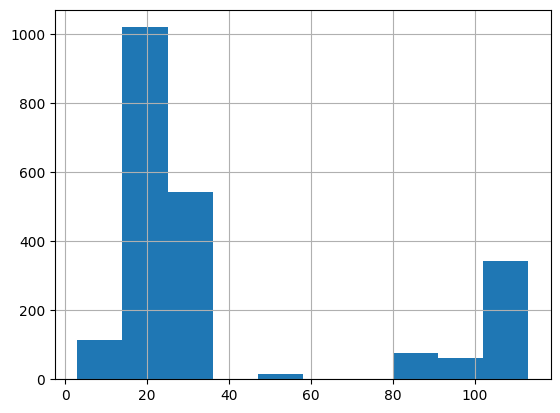

In [100]:
remplissage_an4 = (~an4.isnull()).sum(axis=1)
remplissage_an4.hist()

/tmp/ipykernel_994625/2226914202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(an4.isnull().sum(axis=1), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))


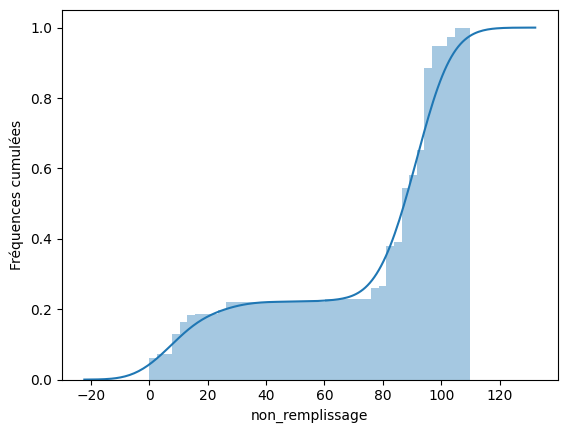

In [114]:

sns.distplot(an4.isnull().sum(axis=1), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
plt.xlabel('non_remplissage')
plt.ylabel('Fréquences cumulées')
plt.show()

<Axes: xlabel='param', ylabel='param'>

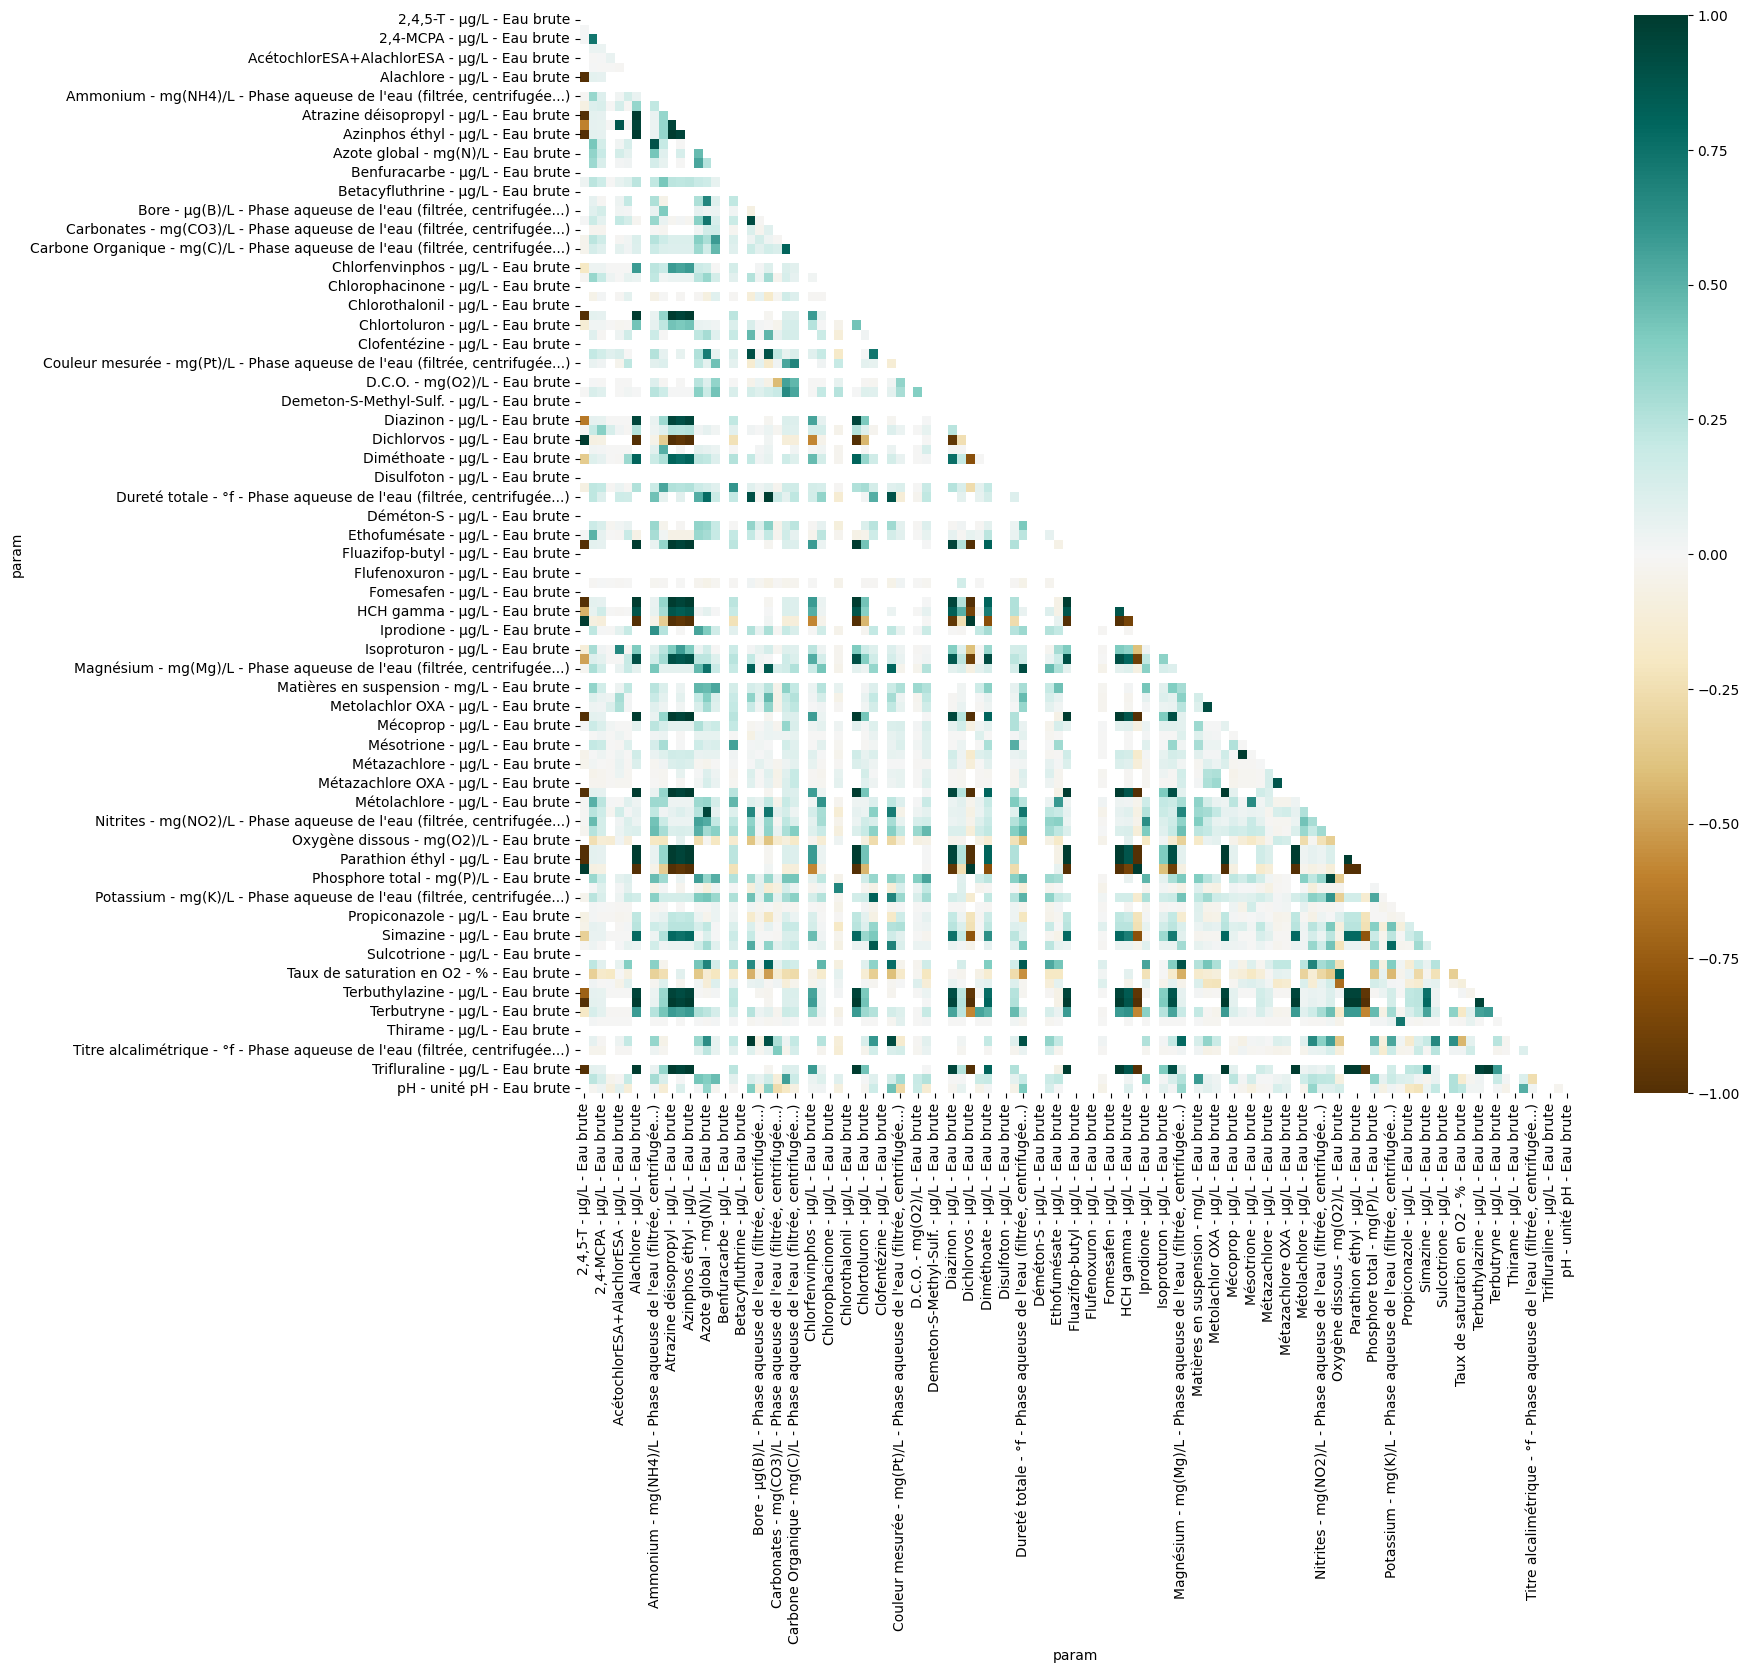

In [102]:
plt.figure(figsize=(16,14))
mask = np.triu(np.ones_like(an4.corr(),dtype=bool))
sns.heatmap(an4.corr(),annot=False,cmap='BrBG',mask=mask)

# Simplification des données

In [103]:
analyses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359564 entries, 0 to 359563
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   CdStationMesureEauxSurface  359564 non-null  int64         
 1   LbStationMesureEauxSurface  359564 non-null  object        
 2   CdSupport                   359564 non-null  int64         
 3   LbSupport                   359564 non-null  object        
 4   CdFractionAnalysee          359564 non-null  int64         
 5   LbFractionAnalysee          359564 non-null  object        
 6   CdPrelevement               359564 non-null  int64         
 7   DatePrel                    359564 non-null  datetime64[ns]
 8   HeurePrel                   356743 non-null  object        
 9   DateAna                     346082 non-null  object        
 10  HeureAna                    345938 non-null  object        
 11  CdParametre                 359564 non-

In [104]:
#20 params les plus présents
frequent_params = analyses_light.groupby("param").size().sort_values(ascending=False).head(20).index
frequent_params

Index(['Température de l'Eau - °C - Eau brute', 'pH - unité pH - Eau brute',
       'Oxygène dissous - mg(O2)/L - Eau brute',
       'Conductivité - µS/cm - Eau brute',
       'Carbone Organique - mg(C)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)',
       'Nitrates - mg(NO3)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)',
       'Taux de saturation en O2 - % - Eau brute',
       'Ammonium - mg(NH4)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)',
       'Orthophosphates - mg(PO4)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)',
       'Nitrites - mg(NO2)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)',
       'Phosphore total - mg(P)/L - Eau brute', 'DBO5 - mg(O2)/L - Eau brute',
       'Matières en suspension - mg/L - Eau brute',
       'Azote Kjeldahl - mg(N)/L - Eau brute',
       'Turbidité Néphélométrique - NFU - Eau brute',
       'Couleur mesurée - mg(Pt)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)',
       'D.C.O. - mg(O2)/L - Eau brut

In [105]:
# series de tous les triplets de params - unité - fraction
param_series = analyses['LbLongParamètre']+' - '+analyses['SymUniteMesure']+ ' - ' + analyses['LbFractionAnalysee']

In [106]:
# filtre des params les plus fréquents
frequent_vals = param_series.isin(frequent_params)


In [107]:
prel_index = [analyses.columns[i] for i in [0,1,6,7]]
analyses_simpl = analyses[frequent_vals].pivot_table(values='RsAna',index=prel_index,columns=param_series[frequent_vals])
analyses_simpl

Ammonium - mg(NH4)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)  \
CdStationMesureEauxSurface LbStationMesureEauxSurface                         CdPrelevement DatePrel                                                                              
2001046                    LE MUHLBACH DE SCHOENAU À SCHOENAU                 4548590       2016-11-28                                               0.02                         
                                                                              6002586       2017-04-19                                               0.06                         
                                                                              6002635       2017-02-20                                               0.01                         
                                                                              6002680       2017-01-23                                               0.07                         
                                                                              6002731       2017-03-20                                               0.02                         
...                                                                                                                                                   ...                         
2098965                    LE FLETTWIESERGRABEN À SILTZHEIM (MOULIN DE SIL... 6002268       2017-03-29                                               0.02                         
                                                                              6013363       2017-05-26                                               0.04                         
                                                                              6131400       2017-07-21                                               0.05                         
                                                                              6133929       2017-09-13                                               0.01                         
                                                                              6152978       2017-11-09                                               0.03                         

                                                                                                        Azote Kjeldahl - mg(N)/L - Eau brute  \
CdStationMesureEauxSurface LbStationMesureEauxSurface                         CdPrelevement DatePrel                                           
2001046                    LE MUHLBACH DE SCHOENAU À SCHOENAU                 4548590       2016-11-28                                  0.50   
                                                                              6002586       2017-04-19                                  0.50   
                                                                              6002635       2017-02-20                                  0.50   
                                                                              6002680       2017-01-23                                  0.50   
                                                                              6002731       2017-03-20                                  0.50   
...                                                                                                                                      ...   
2098965                    LE FLETTWIESERGRABEN À SILTZHEIM (MOULIN DE SIL... 6002268       2017-03-29                                  0.50   
                                                                              6013363       2017-05-26                                  0.50   
                                                                              6131400       2017-07-21                                  0.50   
                                                                              6133929       2017-09-13                                  0.50   
                                                

In [108]:
analyses_simpl.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 67663 entries, (2001046, 'LE MUHLBACH DE SCHOENAU À SCHOENAU', 4548590, Timestamp('2016-11-28 00:00:00')) to (2098965, 'LE FLETTWIESERGRABEN À SILTZHEIM (MOULIN DE SILTZHEIM)', 6152978, Timestamp('2017-11-09 00:00:00'))
Data columns (total 20 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Ammonium - mg(NH4)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)         2000 non-null   float64
 1   Azote Kjeldahl - mg(N)/L - Eau brute                                            1833 non-null   float64
 2   Azote global - mg(N)/L - Eau brute                                              1307 non-null   float64
 3   Azote organique - mg(N)/L - Eau brute                                           1290 non-null   float64
 4   Carbone Organique - mg(C)/L - Phase aq

In [109]:
analyses_simpl.dropna().info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 492 entries, (2001050, 'LE RHIN À RHINAU', 6000393, Timestamp('2017-01-06 00:00:00')) to (2098800, "L'EICHEL À OERMINGEN", 6152822, Timestamp('2017-11-07 00:00:00'))
Data columns (total 20 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Ammonium - mg(NH4)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)         492 non-null    float64
 1   Azote Kjeldahl - mg(N)/L - Eau brute                                            492 non-null    float64
 2   Azote global - mg(N)/L - Eau brute                                              492 non-null    float64
 3   Azote organique - mg(N)/L - Eau brute                                           492 non-null    float64
 4   Carbone Organique - mg(C)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)  492 non-null

In [110]:
analyses_simpl.dropna(thresh = 16).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1778 entries, (2001046, 'LE MUHLBACH DE SCHOENAU À SCHOENAU', 6002586, Timestamp('2017-04-19 00:00:00')) to (2098965, 'LE FLETTWIESERGRABEN À SILTZHEIM (MOULIN DE SILTZHEIM)', 6152978, Timestamp('2017-11-09 00:00:00'))
Data columns (total 20 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Ammonium - mg(NH4)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)         1778 non-null   float64
 1   Azote Kjeldahl - mg(N)/L - Eau brute                                            1777 non-null   float64
 2   Azote global - mg(N)/L - Eau brute                                              1307 non-null   float64
 3   Azote organique - mg(N)/L - Eau brute                                           1290 non-null   float64
 4   Carbone Organique - mg(C)/L - Phase aqu

La majorité des prélèvements ne sont pas complets, mais si on excepte les prélèvements ne contenant que des mesures de température, une majorité de prélèvement contient au moins 16 valeurs.

In [111]:
analyses_simpl2 = analyses_simpl.reset_index(level = analyses_simpl.index.names.index('DatePrel'))
analyses_simpl3 = analyses_simpl2.iloc[:,1:].groupby(by = analyses_simpl2.index.names[:-1]+[analyses_simpl2.DatePrel.dt.year]).mean()
analyses_simpl3

Ammonium - mg(NH4)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)  \
CdStationMesureEauxSurface LbStationMesureEauxSurface                         DatePrel                                                                            
2001046                    LE MUHLBACH DE SCHOENAU À SCHOENAU                 2016                                               0.020000                         
                                                                              2017                                               0.039167                         
2001050                    LE RHIN À RHINAU                                   2016                                               0.080000                         
                                                                              2017                                               0.061923                         
                                                                              2018                                               0.060333                         
...                                                                                                                                   ...                         
2098450                    LE BUTTENBACH À LORENTZEN                          2016                                               0.040000                         
                                                                              2017                                               0.124167                         
2098800                    L'EICHEL À OERMINGEN                               2017                                               0.056667                         
                                                                              2018                                               0.076667                         
2098965                    LE FLETTWIESERGRABEN À SILTZHEIM (MOULIN DE SIL... 2017                                               0.036667                         

                                                                                        Azote Kjeldahl - mg(N)/L - Eau brute  \
CdStationMesureEauxSurface LbStationMesureEauxSurface                         DatePrel                                         
2001046                    LE MUHLBACH DE SCHOENAU À SCHOENAU                 2016                                  0.500000   
                                                                              2017                                  0.533333   
2001050                    LE RHIN À RHINAU                                   2016                                  0.500000   
                                                                              2017                                  0.510000   
                                                                              2018                                  0.788889   
...                                                                                                                      ...   
2098450                    LE BUTTENBACH À LORENTZEN                          2016                                  0.500000   
                                                                              2017                                  0.725000   
2098800                    L'EICHEL À OERMINGEN                               2017                                  0.578333   
                                                                              2018                                  0.977778   
2098965                    LE FLETTWIESERGRABEN À SILTZHEIM (MOULIN DE SIL... 2017                                  0.545000   

                                                                                        Azote global - mg(N)/L - Eau brute  \
CdStationMesureEauxSurface LbStationMesureEauxSurface                         DatePrel                                       
2001046                    LE MUHLBACH DE SCHOENAU 

In [112]:
analyses_simpl.apply(lambda x :pd.qcut(x = x, q = 5,labels = False,duplicates = 'drop'),axis=0)

Ammonium - mg(NH4)/L - Phase aqueuse de l'eau (filtrée, centrifugée...)  \
CdStationMesureEauxSurface LbStationMesureEauxSurface                         CdPrelevement DatePrel                                                                              
2001046                    LE MUHLBACH DE SCHOENAU À SCHOENAU                 4548590       2016-11-28                                                0.0                         
                                                                              6002586       2017-04-19                                                2.0                         
                                                                              6002635       2017-02-20                                                0.0                         
                                                                              6002680       2017-01-23                                                2.0                         
                                                                              6002731       2017-03-20                                                0.0                         
...                                                                                                                                                   ...                         
2098965                    LE FLETTWIESERGRABEN À SILTZHEIM (MOULIN DE SIL... 6002268       2017-03-29                                                0.0                         
                                                                              6013363       2017-05-26                                                1.0                         
                                                                              6131400       2017-07-21                                                1.0                         
                                                                              6133929       2017-09-13                                                0.0                         
                                                                              6152978       2017-11-09                                                1.0                         

                                                                                                        Azote Kjeldahl - mg(N)/L - Eau brute  \
CdStationMesureEauxSurface LbStationMesureEauxSurface                         CdPrelevement DatePrel                                           
2001046                    LE MUHLBACH DE SCHOENAU À SCHOENAU                 4548590       2016-11-28                                   0.0   
                                                                              6002586       2017-04-19                                   0.0   
                                                                              6002635       2017-02-20                                   0.0   
                                                                              6002680       2017-01-23                                   0.0   
                                                                              6002731       2017-03-20                                   0.0   
...                                                                                                                                      ...   
2098965                    LE FLETTWIESERGRABEN À SILTZHEIM (MOULIN DE SIL... 6002268       2017-03-29                                   0.0   
                                                                              6013363       2017-05-26                                   0.0   
                                                                              6131400       2017-07-21                                   0.0   
                                                                              6133929       2017-09-13                                   0.0   
                                                